In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace the path
path = "/content/drive/Shareddrives/Computer Vision/Egg_dataset"

import cv2
import os
import numpy as np

def load_data(path):
    images = []
    labels = []
    labels_bg = []

    grades = ["AA", "B", "D"]
    subdirectories = ["Dark", "Light"]

    for grade in grades:
        for subdirectory in subdirectories:
            subdirectory_path = os.path.join(path, grade, subdirectory)

            if os.path.exists(subdirectory_path):
                for filename in os.listdir(subdirectory_path):
                    if filename.endswith(".png"):  # Change the extension as needed
                        img_path = os.path.join(subdirectory_path, filename)

                        # Read the image using OpenCV
                        img = cv2.imread(img_path)
                        img = cv2.resize(img, (256, 256))

                        # Append the image to the list
                        images.append(img)

                        # Generate the label based on the directory structure (e.g., "A_dark")
                        label = f"{grade}"
                        label_bg = f"{grade}_{subdirectory}"
                        labels.append(label)
                        labels_bg.append(label_bg)

    # Convert the lists to NumPy arrays for easier manipulation
    images = np.array(images)
    labels = np.array(labels)
    labels_bg = np.array(labels_bg)

    return images, labels, labels_bg

In [ ]:
x,y,z = load_data(path)
print(x.shape, y.shape, z.shape)

(180, 256, 256, 3) (180,) (180,)


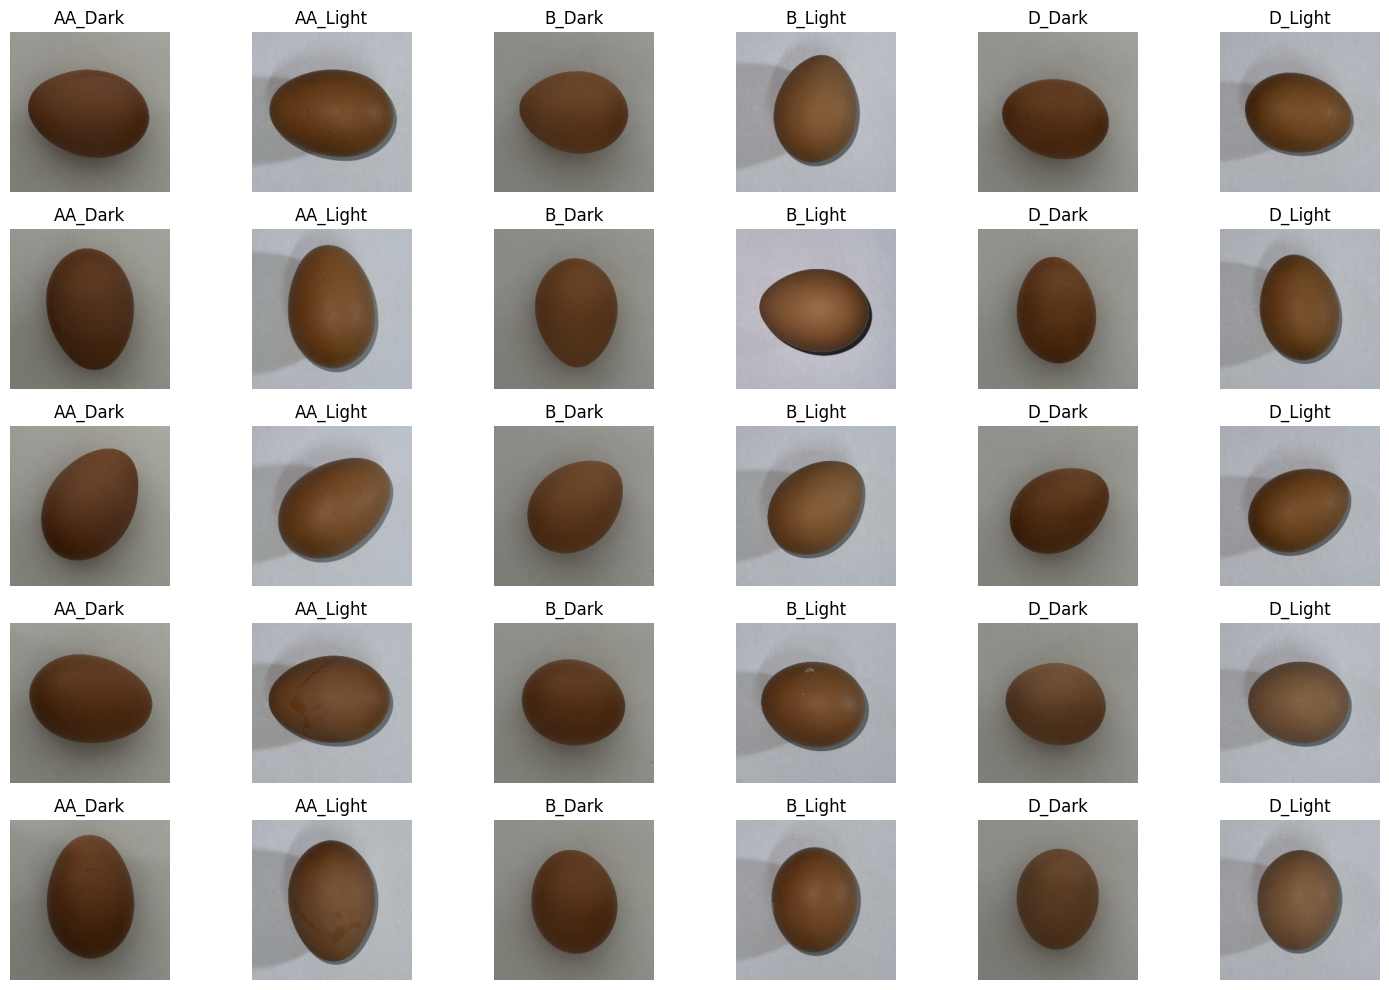

In [ ]:
classes = np.unique(z)
plt.figure(figsize=(15, 10))

for i, class_name in enumerate(classes):
    class_images = x[z == class_name]

    # Plot the first 4 images for each class
    for j in range(5):
        plt.subplot(5, len(classes), j * len(classes) + i + 1)
        plt.imshow(cv2.cvtColor(class_images[j], cv2.COLOR_BGR2RGB))
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in x]
img1 = [cv2.fastNlMeansDenoisingColored(removed, None, 25, 25, 20, 15) for removed in image]
gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in img1]

In [ ]:
_,otsu = zip(*[cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) for img in gray])
se = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
x = [cv2.erode(img, se, iterations=1) for img in otsu]

In [ ]:
x = np.array(x)
print(x.shape, y.shape)

(180, 256, 256) (180,)


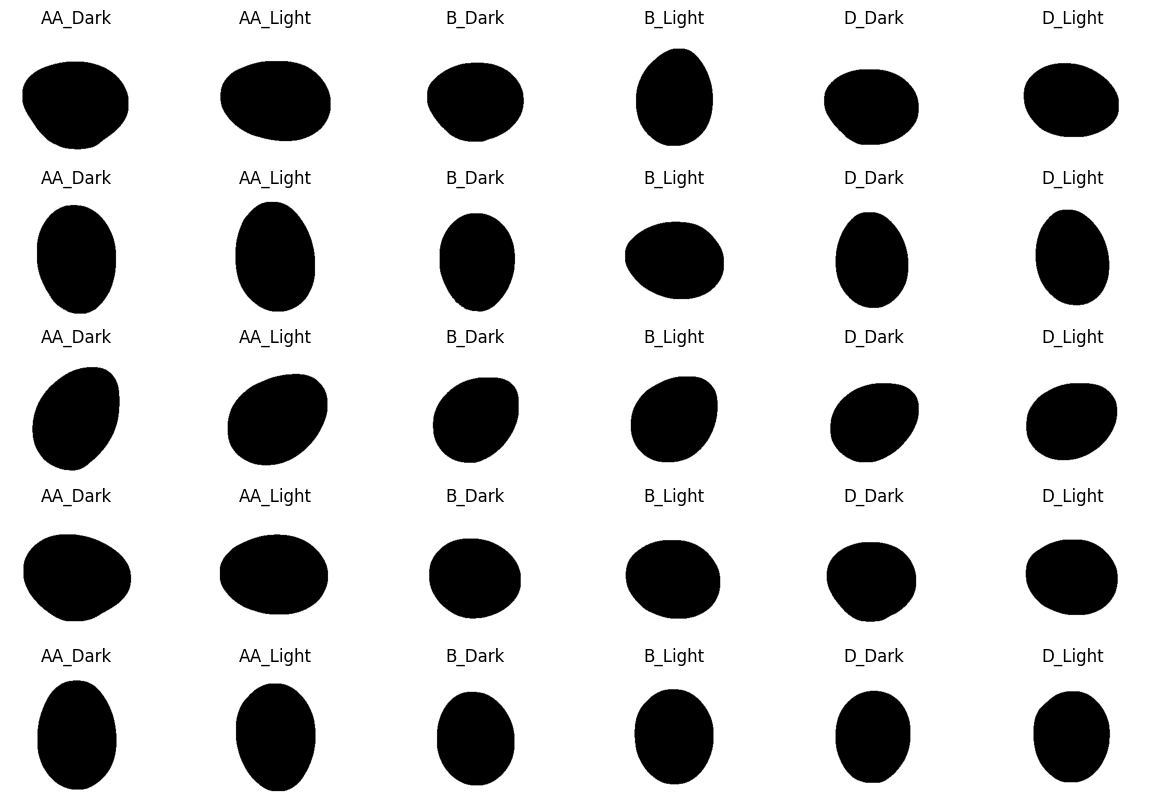

In [ ]:
plt.figure(figsize=(15, 10))

for i, class_name in enumerate(classes):
    class_images = x[z == class_name]


    # Plot the first 4 images for each class
    for j in range(5):
        plt.subplot(5, len(classes), j * len(classes) + i + 1)
        plt.imshow(class_images[j], cmap='gray')
        plt.title(class_name)
        plt.axis('off')

plt.show()

In [ ]:
x = np.array(x)
print(x.shape, y.shape)

(180, 256, 256) (180,)


In [ ]:
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
x_train = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])

In [ ]:
print(x_train.shape, x_test.shape)

(162, 65536) (18, 65536)


In [ ]:
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
nn_classifier = MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted')
}
# Perform 10-fold cross-validation for each classifier
svm_scores = cross_validate(svm_classifier, x_train, y_train, cv=10, scoring=scoring)
knn_scores = cross_validate(knn_classifier, x_train, y_train, cv=10, scoring=scoring)
nn_scores = cross_validate(nn_classifier, x_train, y_train, cv=10, scoring=scoring)

# Print the scores of accuracy, precision, and recall for each classifier
print("Support Vector Machine (SVM) Classifier:")
print(f"Average Accuracy: {np.mean(svm_scores['test_accuracy']):.2f}")
print(f"Average Precision: {np.mean(svm_scores['test_precision_weighted']):.2f}")
print(f"Average Recall: {np.mean(svm_scores['test_recall_weighted']):.2f}")

print("\nk-Nearest Neighbors (k-NN) Classifier:")
print(f"Average Accuracy: {np.mean(knn_scores['test_accuracy']):.2f}")
print(f"Average Precision: {np.mean(knn_scores['test_precision_weighted']):.2f}")
print(f"Average Recall: {np.mean(knn_scores['test_recall_weighted']):.2f}")

print("\nNeural Network Classifier:")
print(f"Average Accuracy: {np.mean(nn_scores['test_accuracy']):.2f}")
print(f"Average Precision: {np.mean(nn_scores['test_precision_weighted']):.2f}")
print(f"Average Recall: {np.mean(nn_scores['test_recall_weighted']):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Support Vector Machine (SVM) Classifier:
Average Accuracy: 0.90
Average Precision: 0.91
Average Recall: 0.90

k-Nearest Neighbors (k-NN) Classifier:
Average Accuracy: 0.92
Average Precision: 0.93
Average Recall: 0.92

Neural Network Classifier:
Average Accuracy: 0.65
Average Precision: 0.67
Average Recall: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
